# Medical Insurance Premium Prediction

## Part 1: Data preprocessing

<b>Dataset link:</b> https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

### About Dataset
#### Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.<br>
#### Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## Part 1: Data preprocessing

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data exploration

<b>Load the data

In [133]:
dataset = pd.read_csv("insurance.csv")

<b>Print first 5 rows from my dataset

In [134]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<b>Print the last 5 rows from my dataset

In [135]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<b>Print the number of rows and columns

In [136]:
dataset.shape

(1338, 7)

<b>Print the information ( type of each column and the value of non-null of each one)

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [138]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [139]:
len(dataset.select_dtypes(include='object').columns)

3

In [140]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [141]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

<b>statistical summary of the data

In [142]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Group the dataset by 'sex', 'smoker', 'region'

In [143]:
dataset.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

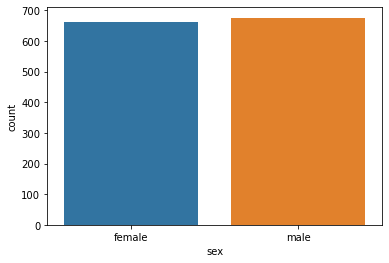

In [144]:
sns.countplot(dataset['sex'])
plt.plot

In [145]:
print(dataset["sex"].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [146]:
dataset.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

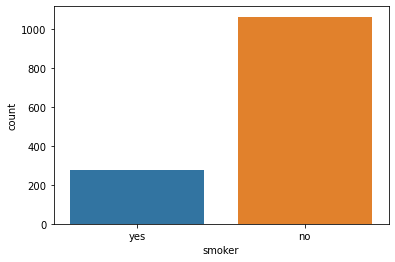

In [147]:
sns.countplot(dataset['smoker'])
plt.plot

In [148]:
print(dataset["smoker"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [149]:
dataset.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

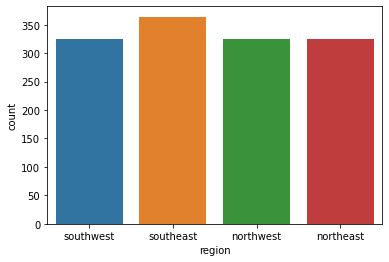

In [150]:
sns.countplot(dataset['region'])
plt.plot

In [151]:
print(dataset['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### Dealing with missing values

In [152]:
dataset.isnull().values.any()

False

In [153]:
dataset.isnull().values.sum()

0

In [154]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b>No missing value exist

### Encoding the categorical data

In [155]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [156]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [157]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [158]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [159]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [160]:
# one hot encoding

dataset = pd.get_dummies(data=dataset, drop_first=True)

In [161]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [162]:
dataset.shape

(1338, 9)

### Correlation matrix

In [163]:
dataset_2 = dataset.drop(columns='charges')

In [164]:
dataset_2.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


<AxesSubplot:title={'center':'Correlation with Charges'}>

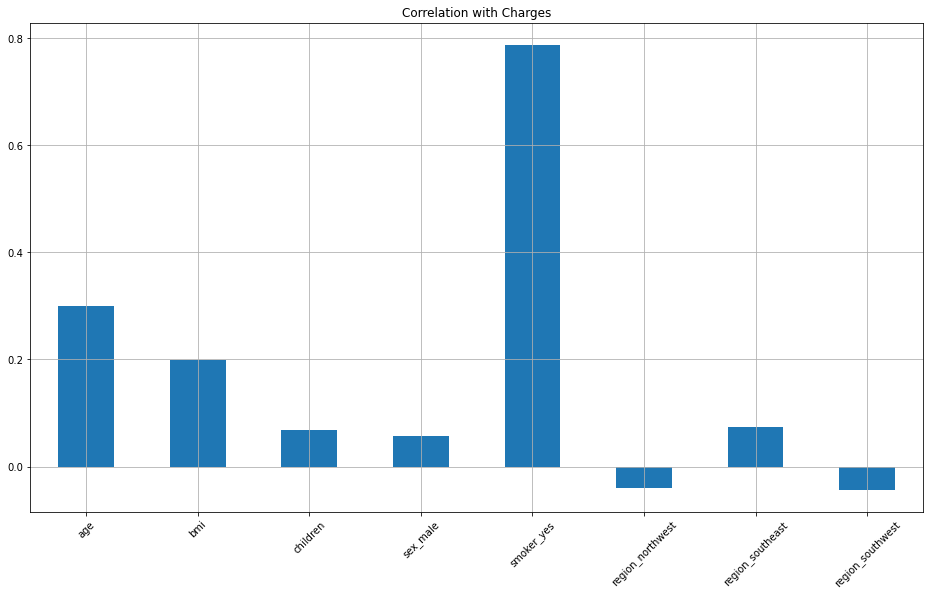

In [165]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correlation with Charges', rot=45, grid=True
)

In [166]:
corr = dataset.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<AxesSubplot:>

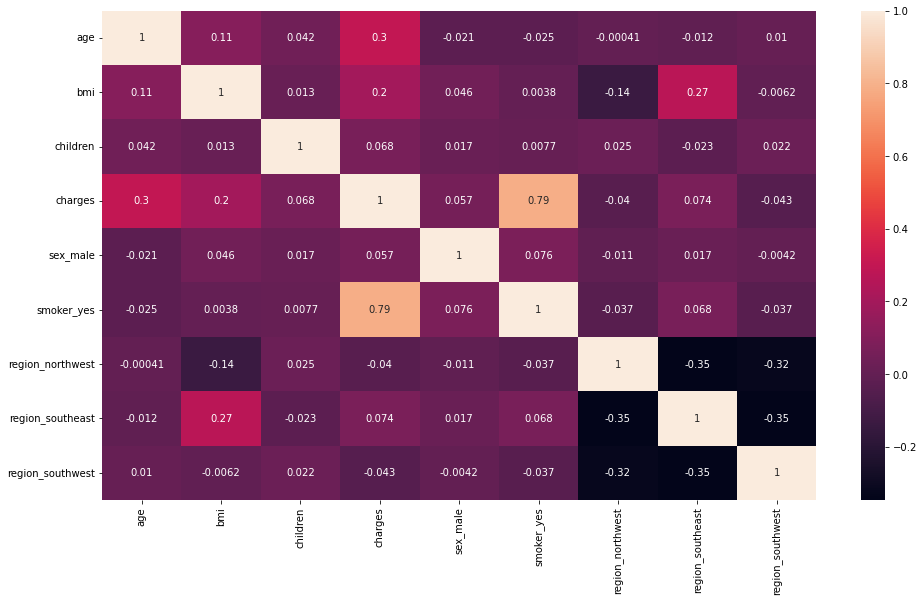

In [167]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

<Figure size 720x432 with 0 Axes>

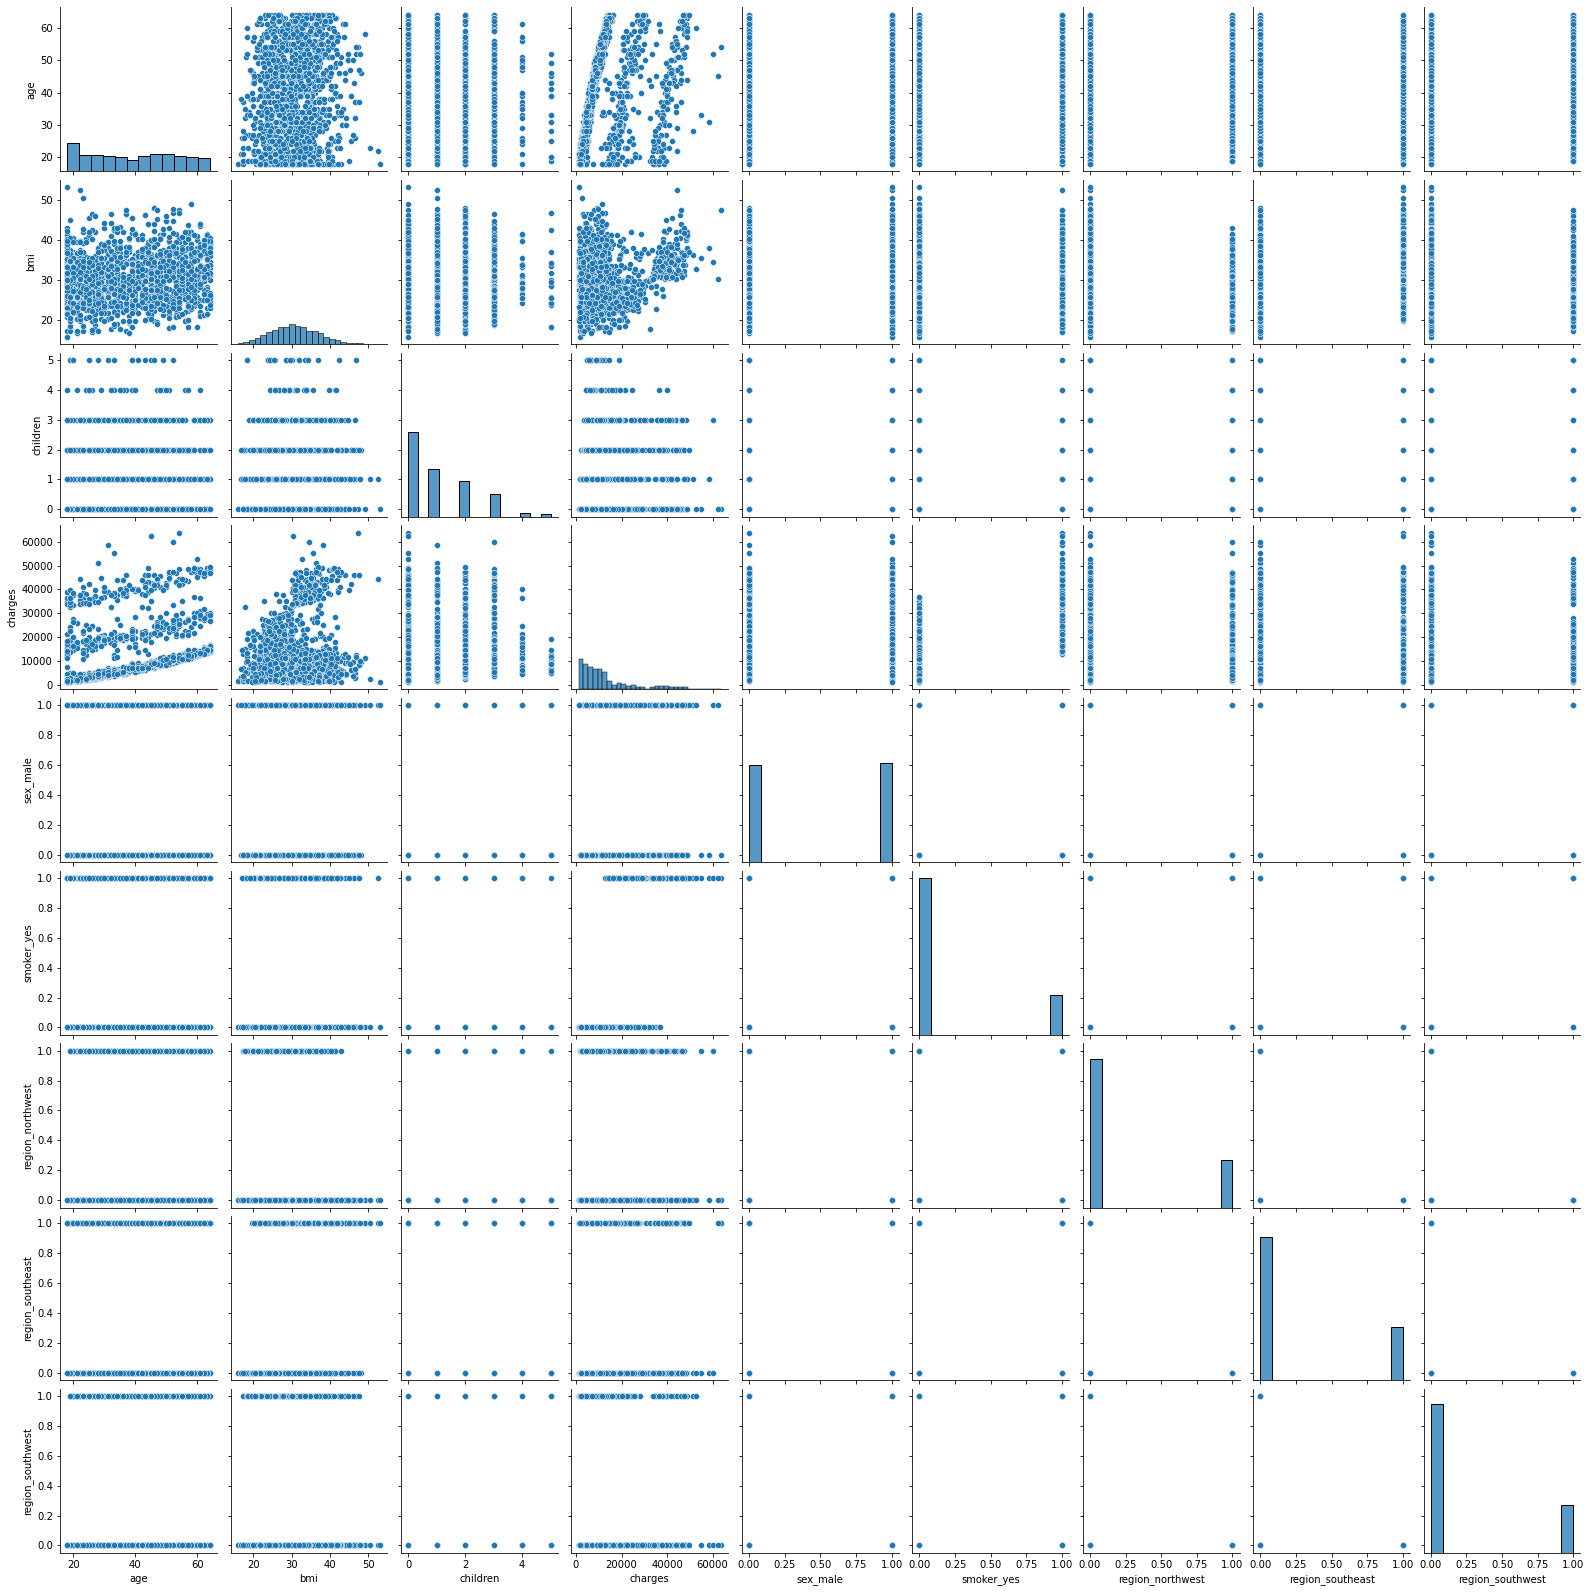

In [168]:
plt.figure(figsize=(10, 6))
sns.pairplot(dataset)

### Splitting the dataset

In [169]:
# matrix of features / independent variables
X = dataset.drop(columns='charges')

In [170]:
# target / dependent variable
Y = dataset['charges']

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [173]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 8) (1070, 8) (268, 8)


In [174]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1070,) (268,)


### Feature scaling

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
sc = StandardScaler()

In [177]:
X_train = sc.fit_transform(X_train)
X_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [178]:
X_test = sc.fit_transform(X_test)
X_test

array([[ 0.88804863, -0.03584905, -0.1324111 , ..., -0.60033831,
        -0.59458839,  2.03809866],
       [ 0.5279926 , -0.18082248, -0.1324111 , ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.60000381,  1.77457214,  0.71249783, ...,  1.66572743,
        -0.59458839, -0.49065338],
       ...,
       [ 1.24810465,  1.72479211, -0.97732004, ..., -0.60033831,
        -0.59458839, -0.49065338],
       [-0.69619788,  1.50995197,  1.55740677, ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.4559814 , -0.97992301,  1.55740677, ..., -0.60033831,
        -0.59458839, -0.49065338]])

## Part 2: Building the model

## 1) Multiple linear regression

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
lr = LinearRegression()

In [181]:
lr.fit(X_train, Y_train)

LinearRegression()

In [182]:
y_pred = lr.predict(X_test)

In [183]:
from sklearn.metrics import  r2_score

In [184]:
acc = r2_score(Y_test, y_pred)

In [185]:
acc

0.7997338990335741

In [186]:
results = pd.DataFrame([['Linear regression', acc]],
                       columns=['Model', 'Accuracy'])

In [187]:
results

,Model,Accuracy
0,Linear regression,0.799734


### 2) Random forest regression

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
rfg = RandomForestRegressor()

In [190]:
rfg.fit(X_train, Y_train)

RandomForestRegressor()

In [191]:
y_pred = rfg.predict(X_test)

In [192]:
acc =r2_score(Y_test, y_pred)
acc

0.8666961312543981

In [193]:
model_results = pd.DataFrame([['Randomforest regression', acc]],
                       columns=['Model', 'Accuracy'])

In [194]:
results = results.append(model_results, ignore_index=True)

In [195]:
results

,Model,Accuracy
0,Linear regression,0.799734
1,Randomforest regression,0.866696


### 3) XGBoost regression

In [196]:
from xgboost import XGBRFRegressor

In [197]:
xgb = XGBRFRegressor()

In [198]:
xgb.fit(X_train, Y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [199]:
y_pred = xgb.predict(X_test)

In [204]:
acc = r2_score(Y_test, y_pred)

In [206]:
acc

0.8918959266688847

In [207]:
model_results = pd.DataFrame([['XGBoot regression', acc]],
                       columns=['Model', 'Accuracy'])

In [208]:
results = results.append(model_results, ignore_index=True)

In [209]:
results

,Model,Accuracy
0,Linear regression,0.799734
1,Randomforest regression,0.866696
2,XGBoot regression,0.866696
3,XGBoot regression,0.891896


### Part 3: Predict charges for a new customer

In [227]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [221]:
def ChargesPred (input_data =[] ):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    prediction = xgb.predict(sc.transform(input_data_reshaped))
    print("The prediction of charges is :",prediction)

<b>example 1<br>
Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [222]:
ChargesPred([40, 45.5, 4, 1, 1, 0, 0, 0])

The prediction of charges is : [43522.168]


<b>example 2<br>
Name: Sara, age:19, bmi:27.9, children:0, sex:female, smoker:no, region: northwest

In [228]:
ChargesPred([19, 27.9, 0, 0, 1, 1, 0, 0])

The prediction of charges is : [17252.766]
